In [0]:
# Imports
# Capital variables means Vectors and lower case means scalar in this notebook
import numpy as np
import h5py, os
from matplotlib import pyplot as plt

In [0]:
# Download the Cat train and test dataset
if not os.path.isfile('train_catvnoncat (1).h5'):
  !gdown https://drive.google.com/uc?id=10IH53Kq43ucRkGEjoINemOzsp424tP67
    
if not os.path.isfile('test_catvnoncat.h5'):
  !gdown https://drive.google.com/uc?id=1kiZ1jt2plot7VrIViM9-R5rU1PemgT5a

In [791]:
train_data = 'train_catvnoncat (1).h5'
test_data = 'test_catvnoncat.h5'

train_file = h5py.File(train_data, 'r')
test_file = h5py.File(test_data, 'r')

# Summary of dataset
print ('Keys in train data: {0}'.format(list(train_file.keys())))
print ('Keys in test data: {0}'.format(list(test_file.keys())))
print ('List of classes: {0}\n'.format([_class.decode('utf-8') for _class in list(train_file['list_classes'])]))

# Load the dataset
X_train, Y_train, X_test, Y_test = np.array(train_file['train_set_x']), np.array(train_file['train_set_y']), np.array(test_file['test_set_x']),np.array( test_file['test_set_y'])

# Summary of the dataset
print ('Shape of training X: {0}'.format(X_train.shape))
print ('Shape of training Y: {0}'.format(Y_train.shape))
print ('Shape of testing X: {0}'.format(X_test.shape))
print ('Shape of testing Y: {0}'.format(Y_test.shape))

Keys in train data: ['list_classes', 'train_set_x', 'train_set_y']
Keys in test data: ['list_classes', 'test_set_x', 'test_set_y']
List of classes: ['non-cat', 'cat']

Shape of training X: (209, 64, 64, 3)
Shape of training Y: (209,)
Shape of testing X: (50, 64, 64, 3)
Shape of testing Y: (50,)


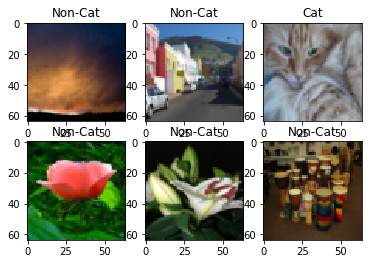

In [792]:
# Plot few image from training dataset
count = 0
for index in range (0, 6):
  plt.subplot(2, 3, count + 1)
  plt.title('Cat' if Y_train[index] == 1 else 'Non-Cat')
  plt.imshow(X_train[index])
  count += 1
plt.show()

In [793]:
# Flatten the images. Arrange the training dataset in such a way that all individual examples are in columns. So it's size will be (m, nx)
X_train = X_train.reshape(X_train.shape[0], -1).T
Y_train = Y_train.reshape(1, -1)
X_test = X_test.reshape(X_test.shape[0], -1).T
Y_test = Y_test.reshape(1, -1)

# Summary of the flattened dataset
print ('Shape of training X: {0}'.format(X_train.shape))
print ('Shape of training Y: {0}'.format(Y_train.shape))
print ('Shape of testing X: {0}'.format(X_test.shape))
print ('Shape of testing Y: {0}'.format(Y_test.shape))
print ("sanity check after reshaping: " + str(X_train[0:5,0]))

Shape of training X: (12288, 209)
Shape of training Y: (1, 209)
Shape of testing X: (12288, 50)
Shape of testing Y: (1, 50)
sanity check after reshaping: [17 31 56 22 33]


In [0]:
# Normalize the dataset
X_train = X_train / 255.0
X_test = X_test / 255.0

In [0]:
# Utility functions

# Sigmoid
def sigmoid (Z):
  return 1.0 / (1 + np.exp(-Z))

# Initialize parameters (weights: w, bias: b) with zeros
# w.shape = (1, <# of features>)
# b is scalar
def init_params (n_x):
  W = np.zeros((n_x, 1))
  b = 0
  
  return W, b

# calculate cost for given params and actual output using cross entropy cost function
def propagate (W, b, X, Y):
  
  # Number of training examples m
  m = X.shape[1]
  
  # FORWARD PROPAGATE
  # First predict using given params and then calculate the cost
  A = sigmoid(np.dot(W.T, X) + b)  # dimensions of A will be (1, m)
  cost = - (np.dot(Y, np.log(A).T) + np.dot(1 - Y, np.log(1 - A).T)) / m   # cost will be scalar
  
  # BACKWARD PROPAGATE
  # Calculate gradients
  dW = (np.dot(X, (A - Y).T)) / m  # shape of dw will be (n_x, 1)
  db = np.sum((A - Y)) / m  # db is scalar
   
  gradients = {
      'dW': dW,
      'db': db
  }
  cost = np.squeeze(cost)
  return gradients, cost

# Predicts the output for given input
def predict (W, b, X):
  
  m = X.shape[1]
  A = sigmoid(np.dot(W.T, X) + b)
  
  Y_hat = np.zeros((1, m))
  
  for itr in range (m):
    Y_hat[:, itr] = 0 if A[:, itr] <= 0.5 else 1
    
  return Y_hat

# Performs gradient descent to optimize given parameters
def optimize (W, b, X, Y, num_iterations, learning_rate):
  
  costs = []
  
  for itr in range (num_iterations):
    
    grads, cost = propagate(W, b, X, Y)
  
    dW = grads['dW']
    db = grads['db']

    W = W - learning_rate * dW
    b = b - learning_rate * db
    
    if itr % 100 == 0:
      costs.append(cost)
      print ('Cost after {0} iterations: {1}'.format(itr, cost))
  
  params = {
      'W': W,
      'b': b
  }
  
  gradients = {
      'dW': dW,
      'db': db
  }
  
  return params, gradients, costs

In [0]:
def model(X_train, Y_train, X_test, Y_test, num_iterations = 2000, learning_rate = 0.005):
  
  # Initialize the model parameters
  W, b = init_params(X_train.shape[0])
  
  # Perform optimization using gradient descent
  params, grads, costs = optimize(W, b, X_train, Y_train, num_iterations, learning_rate)
  W = params['W']
  b = params['b']
  
  # Evaluate the model parameters
  Y_hat_test = predict(W, b, X_test)
  Y_hat_train = predict(W, b, X_train)
  
  train_acc = 100 - np.mean(np.abs(Y_hat_train - Y_train)) * 100
  test_acc = 100 - np.mean(np.abs(Y_hat_test - Y_test)) * 100
  
  params = {
      'W': W,
      'b': b
  }
  
  return train_acc, test_acc, costs, params
  
  

In [797]:
num_iterations, learning_rate = 901, 0.005
training_acc, testing_acc, costs, params = model(X_train, Y_train, X_test, Y_test, num_iterations, learning_rate)
print ('Training accuracy {0}'.format(training_acc))
print ('Testing accuracy: {0}'.format(testing_acc))

Cost after 0 iterations: 0.6931471805599453
Cost after 100 iterations: 0.5845083636993087
Cost after 200 iterations: 0.46694904094655476
Cost after 300 iterations: 0.3760068669480209
Cost after 400 iterations: 0.33146328932825125
Cost after 500 iterations: 0.30327306747438293
Cost after 600 iterations: 0.27987958658260487
Cost after 700 iterations: 0.2600421369258757
Cost after 800 iterations: 0.2429406846779662
Cost after 900 iterations: 0.2280042225672606
Training accuracy 96.17224880382776
Testing accuracy: 74.0


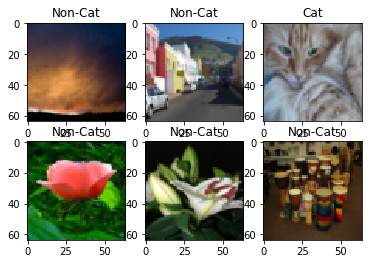

In [798]:
# Plot few predictions

Y_hat = np.squeeze(predict(params['W'], params['b'], X_train[:, 0 : 6]))
count = 0
for index in range (0, 6):
  plt.subplot(2, 3, count + 1)
  plt.title('Cat' if Y_hat[index] == 1 else 'Non-Cat')
  plt.imshow(X_train.reshape(64, 64, 3, -1)[: , :, :, index])
  count += 1
plt.show()

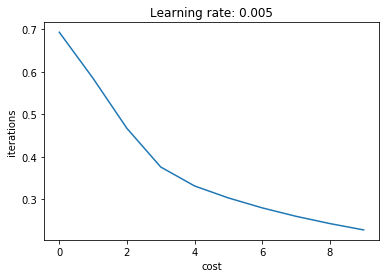

In [799]:
# Plot iterations vs cost graph (reduction in cost as model learns)
plt.plot(costs)
plt.xlabel('cost')
plt.ylabel('iterations')
plt.title('Learning rate: {0}'.format(learning_rate))
plt.show()